In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import joblib

reading of data

In [3]:
df = pd.read_csv("/Users/yuvashankarnarayana/Documents/Helath_insurance_LM/HI_data.csv")

In [4]:
df.head(5)

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim
0,60.0,male,64,24.3,NoDisease,1,0,NewYork,72,0,0,Actor,13112.6
1,49.0,female,75,22.6,NoDisease,1,0,Boston,78,1,1,Engineer,9567.0
2,32.0,female,64,17.8,Epilepsy,2,1,Phildelphia,88,1,1,Academician,32734.2
3,61.0,female,53,36.4,NoDisease,1,1,Pittsburg,72,1,0,Chef,48517.6
4,19.0,female,50,20.6,NoDisease,0,0,Buffalo,82,1,0,HomeMakers,1731.7


In [5]:
df.drop(labels='city', axis=1, inplace=True)

In [6]:
df.drop(labels="job_title",axis=1,inplace=True)

In [7]:
df.head()

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,bloodpressure,diabetes,regular_ex,claim
0,60.0,male,64,24.3,NoDisease,1,0,72,0,0,13112.6
1,49.0,female,75,22.6,NoDisease,1,0,78,1,1,9567.0
2,32.0,female,64,17.8,Epilepsy,2,1,88,1,1,32734.2
3,61.0,female,53,36.4,NoDisease,1,1,72,1,0,48517.6
4,19.0,female,50,20.6,NoDisease,0,0,82,1,0,1731.7


encoding data male to 1 , female 0

In [8]:
df.replace({"sex":{"male":1,"female":0}},inplace=True)

/var/folders/62/gqs95rb96tn4fy_q32xck61h0000gn/T/ipykernel_79654/3198259438.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({"sex":{"male":1,"female":0}},inplace=True)


In [9]:
df.head()

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,bloodpressure,diabetes,regular_ex,claim
0,60.0,1,64,24.3,NoDisease,1,0,72,0,0,13112.6
1,49.0,0,75,22.6,NoDisease,1,0,78,1,1,9567.0
2,32.0,0,64,17.8,Epilepsy,2,1,88,1,1,32734.2
3,61.0,0,53,36.4,NoDisease,1,1,72,1,0,48517.6
4,19.0,0,50,20.6,NoDisease,0,0,82,1,0,1731.7


In [10]:
df.describe()

,age,sex,weight,bmi,no_of_dependents,smoker,bloodpressure,diabetes,regular_ex,claim
count,14604.000000,15000.000000,15000.000000,14044.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,39.547521,0.489867,64.909600,30.266413,1.129733,0.198133,68.650133,0.777000,0.224133,13401.437620
std,14.015966,0.499914,13.701935,6.122950,1.228469,0.398606,19.418515,0.416272,0.417024,12148.239619
min,18.000000,0.000000,34.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1121.900000
25%,27.000000,0.000000,54.000000,25.700000,0.000000,0.000000,64.000000,1.000000,0.000000,4846.900000
50%,40.000000,0.000000,63.000000,29.400000,1.000000,0.000000,71.000000,1.000000,0.000000,9545.650000
75%,52.000000,1.000000,76.000000,34.400000,2.000000,0.000000,80.000000,1.000000,0.000000,16519.125000
max,64.000000,1.000000,95.000000,53.100000,5.000000,1.000000,122.000000,1.000000,1.000000,63770.400000


bmi distribution 


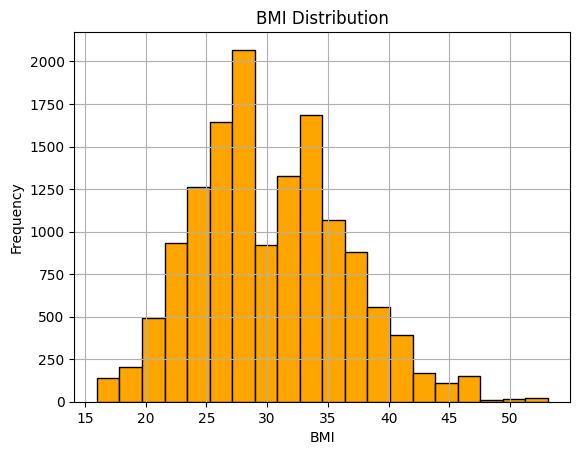

In [11]:
plt.hist(df['bmi'], bins=20, color='orange', edgecolor='black')
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [12]:
df.drop(labels="hereditary_diseases",axis=1,inplace=True)

In [13]:
df.head()

,age,sex,weight,bmi,no_of_dependents,smoker,bloodpressure,diabetes,regular_ex,claim
0,60.0,1,64,24.3,1,0,72,0,0,13112.6
1,49.0,0,75,22.6,1,0,78,1,1,9567.0
2,32.0,0,64,17.8,2,1,88,1,1,32734.2
3,61.0,0,53,36.4,1,1,72,1,0,48517.6
4,19.0,0,50,20.6,0,0,82,1,0,1731.7


In [14]:
X = df[["age", "sex", "weight", "no_of_dependents", "smoker", "bmi", "bloodpressure", "diabetes", "regular_ex"]]
Y = df["claim"]

In [ ]:
plt.boxplot(df['claim'])
plt.title("Claim Amount Box Plot")
plt.ylabel("Claim")
plt.grid(True)
plt.show()


In [16]:
X.head()

,age,sex,weight,no_of_dependents,smoker,bmi,bloodpressure,diabetes,regular_ex
0,60.0,1,64,1,0,24.3,72,0,0
1,49.0,0,75,1,0,22.6,78,1,1
2,32.0,0,64,2,1,17.8,88,1,1
3,61.0,0,53,1,1,36.4,72,1,0
4,19.0,0,50,0,0,20.6,82,1,0


In [17]:
X.shape


(15000, 9)

In [18]:
X.dropna()

,age,sex,weight,no_of_dependents,smoker,bmi,bloodpressure,diabetes,regular_ex
0,60.0,1,64,1,0,24.3,72,0,0
1,49.0,0,75,1,0,22.6,78,1,1
2,32.0,0,64,2,1,17.8,88,1,1
3,61.0,0,53,1,1,36.4,72,1,0
4,19.0,0,50,0,0,20.6,82,1,0
...,...,...,...,...,...,...,...,...,...
14995,39.0,1,49,1,1,28.3,54,1,0
14996,39.0,1,74,4,0,29.6,64,1,0
14997,20.0,1,62,0,0,33.3,52,1,0
14998,52.0,1,88,0,0,36.7,70,1,0


In [19]:
Y.dropna

<bound method Series.dropna of 0        13112.6
1         9567.0
2        32734.2
3        48517.6
4         1731.7
          ...   
14995    21082.2
14996     7512.3
14997     1391.5
14998     9144.6
14999    25992.8
Name: claim, Length: 15000, dtype: float64>

In [20]:
Y.shape

(15000,)

In [21]:
X_train , X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [22]:
print(X.shape,X_train.shape,X_test.shape,Y_train.shape)

(15000, 9) (12000, 9) (3000, 9) (12000,)


In [23]:
model = LinearRegression()

In [24]:

df.drop(labels='city', axis=1, inplace=True, errors='ignore')
df.drop(labels="job_title", axis=1, inplace=True, errors='ignore')
df.drop(labels="hereditary_diseases", axis=1, inplace=True, errors='ignore')

X = X.dropna()
Y = Y.dropna()
print(X.shape, Y.shape)

(13648, 9) (15000,)


checking for null values

In [25]:
X.isnull().sum()
Y.isnull().sum()

np.int64(0)

In [26]:
print(X.isna().sum())


age                 0
sex                 0
weight              0
no_of_dependents    0
smoker              0
bmi                 0
bloodpressure       0
diabetes            0
regular_ex          0
dtype: int64


In [27]:
print("Missing values in Y:", Y.isna().sum())


Missing values in Y: 0


checking for missing value and found some

In [28]:
print("NaNs in X_train:", pd.DataFrame(X_train).isna().sum())
print("Total NaNs in X_train:", pd.DataFrame(X_train).isna().sum().sum())

print("NaNs in Y_train:", pd.Series(Y_train).isna().sum())


NaNs in X_train: age                 315
sex                   0
weight                0
no_of_dependents      0
smoker                0
bmi                 769
bloodpressure         0
diabetes              0
regular_ex            0
dtype: int64
Total NaNs in X_train: 1084
NaNs in Y_train: 0


using imputer to fill NaNs

In [29]:

imputer = SimpleImputer(strategy='mean')

X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)

model = LinearRegression()
model.fit(X_train_imputed, Y_train)


LinearRegression()

evaluation

In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X_test_imputed = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)  # Ensure test data is imputed
Y_pred = model.predict(X_test_imputed)


mse = mean_squared_error(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print("Model Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")


predictions = pd.DataFrame({
    "Actual": Y_test,
    "Predicted": Y_pred
})
print(predictions.head())

Model Evaluation Metrics:
Mean Squared Error (MSE): 40224919.17075218
R-squared (R2): 0.716304643557899
       Actual     Predicted
7592   3578.0   4512.563361
3551   2842.8   2994.037312
9698  17085.3  26092.737899
3759  15161.5  17171.411372
2353  12268.6  15254.864517


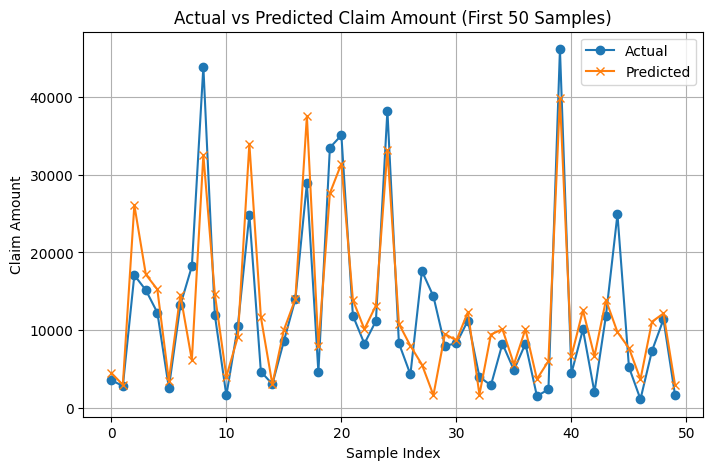

In [31]:
plt.figure(figsize=(8,5))
plt.plot(Y_test.values[:50], label='Actual', marker='o')
plt.plot(Y_pred[:50], label='Predicted', marker='x')
plt.title("Actual vs Predicted Claim Amount (First 50 Samples)")
plt.xlabel("Sample Index")
plt.ylabel("Claim Amount")
plt.legend()
plt.grid(True)
plt.show()


model exporting


In [32]:
joblib.dump(model, 'trained_model.pkl')  # Save the trained model
joblib.dump(imputer, 'imputer.pkl')

['imputer.pkl']

creating the imputed data set


In [33]:
df2 = [[X_test_imputed,X_train_imputed,Y_train,Y_test]]

In [34]:
df.to_csv("Imputed_data.csv")

In [35]:

param_grid = {
    'n_estimators': [100, 150],          
    'max_depth': [10, 15, None],         
    'min_samples_split': [2, 5],         
    'min_samples_leaf': [1, 2]           
}


rf = RandomForestRegressor(random_state=2)


grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    scoring='r2',
    verbose=1
)

Fitting in a grid_search model for training 

In [36]:
grid_search.fit(X_train_imputed, Y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=2), n_jobs=-1,
             param_grid={'max_depth': [10, 15, None],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 150]},
             scoring='r2', verbose=1)

fetches out the best model from grid_search results

In [37]:
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}


In [38]:
Y_pred = best_model.predict(X_test_imputed)

re - evaluation as we hypertunned our parameters

In [39]:
mse = mean_squared_error(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print("Model Evaluation Metrics (Random Forest + GridSearchCV):")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")


Model Evaluation Metrics (Random Forest + GridSearchCV):
Mean Squared Error (MSE): 4421182.364240875
Mean Absolute Error (MAE): 375.42061439323766
R-squared (R2): 0.9688186096435756


we got here a jump of 25% that is from 71% to 96% 

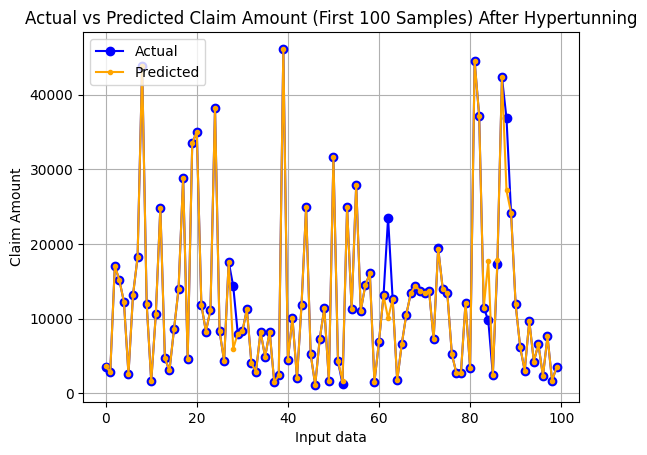

In [40]:
plt.plot(Y_test.values[:100], label='Actual',color = "blue", marker='o')
plt.plot(Y_pred[:100], label='Predicted', marker='.',color = "orange")
plt.title("Actual vs Predicted Claim Amount (First 100 Samples) After Hypertunning")
plt.xlabel("Input data")
plt.ylabel("Claim Amount")
plt.legend()
plt.grid(True)
plt.show()


In [41]:
joblib.dump(model, 'trained_model(tunned).pkl')  # Save the trained model
joblib.dump(imputer, 'imputer.pkl')

['imputer.pkl']